In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
dataset = pd.read_csv("datos/nutrients_csvfile.csv").dropna()
X = dataset[["Calories", "Grams"]].values 

                      Food Measure  Grams  Calories Protein Fat Sat.Fat Fiber  \
0               Cows' milk   1 qt.    976     660.0      32  40      36     0   
1                Milk skim   1 qt.    984     360.0      36   t       t     0   
2               Buttermilk   1 cup    246     127.0       9   5       4     0   
3    Evaporated. undiluted   1 cup    252     345.0      16  20      18     0   
4           Fortified milk  6 cups   1419    1373.0      89  42      23   1.4   
..                     ...     ...    ...       ...     ...  ..     ...   ...   
329    Fruit-flavored soda  12 oz.    346     161.0       0   0       0     0   
330             Ginger ale  12 oz.    346     105.0       0   0       0     0   
331              Root beer  12 oz.    346     140.0       0   0       0     0   
332                 Coffee   1 cup    230       3.0       t   0       0     0   
333                    Tea   1 cup    230       4.0       0   t       0     0   

    Carbs                  

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

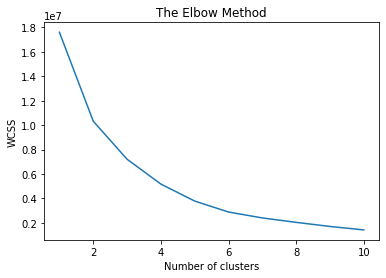

In [54]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Text(0, 0.5, 'Calorias en Kcal')

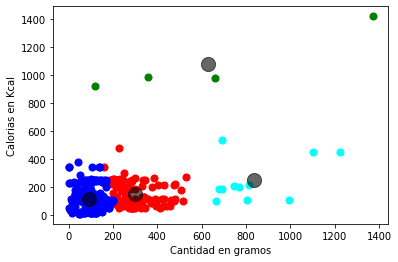

In [56]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', alpha=0.6)
plt.xlabel("Cantidad en gramos")
plt.ylabel("Calorias en Kcal")

Pertenece al cluster 1


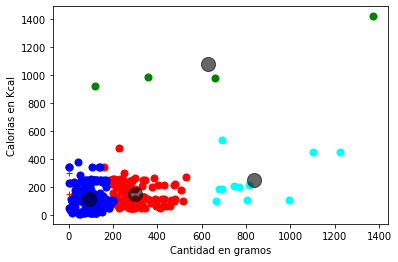

In [57]:
predict_data = [[float(input("Ingresa la cantidad del alimento en gramos: ")), float(input("Ingresa la cantidad de calorías en Kcal o Cal: "))]]

prediction = kmeans.predict(predict_data)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.plot(predict_data, "r+")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', alpha=0.6)
plt.xlabel("Cantidad en gramos")
plt.ylabel("Calorias en Kcal")

print(f"Pertenece al cluster {prediction[0]}")